In [1]:
### Utility Functions
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error
import numpy as np

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows



In [2]:
normalized_database_filename = 'normalized.db'

In [3]:
### Create 4 tables 
## Table1 District: DistrictName[PK]
## Table2 CrimeCategory: CrimeCategory[PK]
## Table3 Resolution: ResolutionDetail[PK]
## Table4 Incident:

In [4]:
def step1_create_district_table(data_filename, normalized_database_filename):

    #create connection
    with sqlite3.connect(normalized_database_filename) as conn:
    #create table
        create_table_District_sql ="""CREATE TABLE District(
        DistrictName TEXT NOT NULL PRIMARY KEY)"""

        create_table(conn, create_table_District_sql,drop_table_name='District')


        district_unique = []
        #split data and extract distinct region
        data_df = pd.read_csv(data_filename,sep = ',')
        #print(data_df)
        data_df_district = data_df.PdDistrict
        diff = data_df_district.unique()
        sort = np.sort(diff)
        #print(sort)

        #use for loop to put in array
        for d_name in sort:
            my_tuple = tuple([d_name])
            district_unique.append(my_tuple)

        

        #insert the list into the table created
        sql_insert_district = """INSERT INTO District(DistrictName)
                 values (?);"""
        conn = create_connection(normalized_database_filename)
        cur = conn.cursor()
        cur.executemany(sql_insert_district, district_unique)
        conn.commit()
        df = pd.read_sql_query("""SELECT * FROM District""", conn)
        display(df)


In [5]:
data_filename = 'Police_Department_Incidents_-_Previous_Year__2016_.csv'
step1_create_district_table(data_filename, normalized_database_filename)

,DistrictName
0,BAYVIEW
1,CENTRAL
2,INGLESIDE
3,MISSION
4,NORTHERN
5,PARK
6,RICHMOND
7,SOUTHERN
8,SUNNYDALE
9,TARAVAL


In [6]:
def step2_create_category_table(data_filename, normalized_database_filename):

    #create connection
    with sqlite3.connect(normalized_database_filename) as conn:
    
        #create table
        create_table_crimecategory_sql ="""CREATE TABLE CrimeCategory(
        CrimeCategory TEXT NOT NULL PRIMARY KEY)"""

        create_table(conn, create_table_crimecategory_sql,drop_table_name='CrimeCategory')


        crimecategory_unique = []
        #split data and extract distinct CrimeCategory
        data_df = pd.read_csv(data_filename,sep = ',')
        data_df_category = data_df.Category
        diff = data_df_category.unique()
        sort = np.sort(diff)
        #print(sort)

        #use for loop to put in array
        for cc_name in sort:
            my_tuple = tuple([cc_name])
            crimecategory_unique.append(my_tuple)
        #print(crimecategory_unique)

        #insert the list into the table created
        sql_insert_crimecategory = """INSERT INTO CrimeCategory(CrimeCategory)
                 values (?);"""

        conn = create_connection(normalized_database_filename)
        cur = conn.cursor()
        cur.executemany(sql_insert_crimecategory, crimecategory_unique)
        conn.commit()
        df = pd.read_sql_query("""SELECT * FROM CrimeCategory""", conn)
        display(df)

In [7]:
data_filename = 'Police_Department_Incidents_-_Previous_Year__2016_.csv'
step2_create_category_table(data_filename, normalized_database_filename)

,CrimeCategory
0,ARSON
1,ASSAULT
2,BAD CHECKS
3,BRIBERY
4,BURGLARY
5,DISORDERLY CONDUCT
6,DRIVING UNDER THE INFLUENCE
7,DRUG/NARCOTIC
8,DRUNKENNESS
9,EMBEZZLEMENT


In [8]:
def step3_create_resolution_table(data_filename, normalized_database_filename):

    #create connection
    with sqlite3.connect(normalized_database_filename) as conn:
    
    #create table
        create_table_resolution_sql ="""CREATE TABLE Resolution(
        ResolutionDetail TEXT NOT NULL PRIMARY KEY)"""

        create_table(conn, create_table_resolution_sql,drop_table_name='Resolution')


        resolution_unique = []
        #split data and extract distinct resolutions
        data_df = pd.read_csv(data_filename,sep = ',')
        data_df_resolution = data_df.Resolution
        diff = data_df_resolution.unique()
        sort = np.sort(diff)
        #print(sort)

        #use for loop to put in array
        for r_name in sort:
            my_tuple = tuple([r_name])
            resolution_unique.append(my_tuple)
        #print(resolution_unique)

        #insert the list into the table created
        sql_insert_resolution = """INSERT INTO Resolution(ResolutionDetail)
                 values (?);"""

        conn = create_connection(normalized_database_filename)
        cur = conn.cursor()
        cur.executemany(sql_insert_resolution, resolution_unique)
        conn.commit()
        df = pd.read_sql_query("""SELECT * FROM Resolution""", conn)
        display(df)

In [9]:
data_filename = 'Police_Department_Incidents_-_Previous_Year__2016_.csv'
step3_create_resolution_table(data_filename, normalized_database_filename)

,ResolutionDetail
0,"ARREST, BOOKED"
1,"ARREST, CITED"
2,CLEARED-CONTACT JUVENILE FOR MORE INFO
3,COMPLAINANT REFUSES TO PROSECUTE
4,EXCEPTIONAL CLEARANCE
5,JUVENILE BOOKED
6,JUVENILE CITED
7,JUVENILE DIVERTED
8,LOCATED
9,NONE


In [10]:
def step4_create_incident_table(data_filename, normalized_database_filename):

    #create connection
    with sqlite3.connect(normalized_database_filename) as conn:

        #create table
        create_table_incident_sql =""" CREATE TABLE Incident (
            [IncidentID] INTEGER  NOT NULL PRIMARY KEY,
            [IncidentNum] INTEGER  NOT NULL,
            [Descript] TEXT NOT NULL,
            [DayofWeek] TEXT NOT NULL,
            [Date] TEXT NOT NULL,
            [Time] TEXT NOT NULL,
            [Address] TEXT NOT NULL,
            [Location] Text NOT NULL,
            [PdID] INTEGER NOT NULL,

            [DistrictName] TEXT NOT NULL,
            [CrimeCategory] TEXT NOT NULL,
            [ResolutionDetail] TEXT NOT NULL,

            FOREIGN KEY(DistrictName) REFERENCES District(DistrictName)
            FOREIGN KEY(CrimeCategory) REFERENCES CrimeCategory(CrimeCategory)
            FOREIGN KEY(ResolutionDetail) REFERENCES Resolution(ResolutionDetail)
            ) """ 

        create_table(conn, create_table_incident_sql, drop_table_name='Incident')


        Incident_unique = []
        data_df = pd.read_csv(data_filename,sep = ',')
   
        for i in data_df.itertuples():
            IncidentNum = i.IncidntNum
            Descript = i.Descript
            DayofWeek = i.DayOfWeek
            Date = i.Date
            Time = i.Time
            Address = i.Address
            Location = i.Location
            PdID = i.PdId
            DistrictName = i.PdDistrict
            CrimeCategory = i.Category
            ResolutionDetail = i.Resolution

            my_tuple = tuple([IncidentNum, Descript, DayofWeek, Date, Time, Address, Location, PdID, DistrictName, CrimeCategory, ResolutionDetail])
            Incident_unique.append(my_tuple)
        #insert the list into the table created
        sql_insert_crimecategory = """INSERT INTO Incident(IncidentNum, Descript, DayofWeek, Date, Time, Address, Location, PdID, DistrictName, CrimeCategory, ResolutionDetail)
                 values (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);"""

        conn = create_connection(normalized_database_filename)
        cur = conn.cursor()
        cur.executemany(sql_insert_crimecategory, Incident_unique)
        conn.commit()
        df = pd.read_sql_query("""SELECT * FROM Incident""", conn)
        display(df)

In [11]:
data_filename = 'Police_Department_Incidents_-_Previous_Year__2016_.csv'
step4_create_incident_table(data_filename, normalized_database_filename)

,IncidentID,IncidentNum,Descript,DayofWeek,Date,Time,Address,Location,PdID,DistrictName,CrimeCategory,ResolutionDetail
0,1,120058272,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,800 Block of BRYANT ST,"(37.775420706711, -122.403404791479)",12005827212120,SOUTHERN,WEAPON LAWS,"ARREST, BOOKED"
1,2,120058272,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,800 Block of BRYANT ST,"(37.775420706711, -122.403404791479)",12005827212168,SOUTHERN,WEAPON LAWS,"ARREST, BOOKED"
2,3,141059263,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,KEITH ST / SHAFTER AV,"(37.7299809672996, -122.388856204292)",14105926363010,BAYVIEW,WARRANTS,"ARREST, BOOKED"
3,4,160013662,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,JONES ST / OFARRELL ST,"(37.7857883766888, -122.412970537591)",16001366271000,TENDERLOIN,NON-CRIMINAL,NONE
4,5,160002740,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,16TH ST / MISSION ST,"(37.7650501214668, -122.419671780296)",16000274071000,MISSION,NON-CRIMINAL,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...
150495,150496,161061000,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,OAK ST / STANYAN ST,"(37.7714278595913, -122.453981622365)",16106100004134,PARK,ASSAULT,NONE
150496,150497,176000742,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,JACKSON ST / SANSOME ST,"(37.7966261239618, -122.401857374739)",17600074271000,CENTRAL,NON-CRIMINAL,NONE
150497,150498,176000758,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,PINE ST / TAYLOR ST,"(37.7906727649886, -122.41226909106)",17600075806372,CENTRAL,LARCENY/THEFT,NONE
150498,150499,176000764,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,200 Block of STOCKTON ST,"(37.7882745285785, -122.406658711008)",17600076406374,CENTRAL,LARCENY/THEFT,NONE


In [12]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
data = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [14]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  int64  
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150500 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [16]:
data.describe()

,IncidntNum,X,Y,PdId
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616440e+13
std,5.535976e+06,0.026210,0.023637,5.535976e+11
min,1.135121e+07,-122.513642,37.707922,1.135121e+12
25%,1.603283e+08,-122.434036,37.756486,1.603283e+13
50%,1.606541e+08,-122.416903,37.775421,1.606541e+13
75%,1.609764e+08,-122.406605,37.785063,1.609764e+13
max,9.910090e+08,-122.365565,37.819975,9.910090e+13


In [17]:
# DATA CLENAING
##1# Dropping the columns Incident Number (IncidntNum) as it doesn't 
### provide any useful information for the analysis 

In [18]:
#deleting incident number
data.drop(columns = ['IncidntNum'], axis = 1, inplace = True)

In [19]:
data.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [20]:
data.Date = data.Date.str.split()
#Extracting the date from the Date Column and removing the 12:00:00 AM 
# from the column as it appears in the every column
data.Date = data.Date.apply(lambda x: x[0])

In [21]:
data.Date 

0         01/29/2016
1         01/29/2016
2         04/25/2016
3         01/05/2016
4         01/01/2016
             ...    
150495    12/30/2016
150496    12/30/2016
150497    12/29/2016
150498    12/30/2016
150499    12/02/2016
Name: Date, Length: 150500, dtype: object

In [22]:
### 我说
###SQL Statement
### Display total incidents happened in each district according to the CrimeCategory; sorting by total in descending order. 
### Output column: District, total incidents, CrimeCategory
conn = create_connection(normalized_database_filename)
cur = conn.cursor()
sql_statement = "Select DistrictName, CrimeCategory, count(IncidentID) as total_Incidents from Incident inner join District using (DistrictName) inner join CrimeCategory using (CrimeCategory) group by CrimeCategory order by DistrictName, total_Incidents desc ;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,DistrictName,CrimeCategory,total_Incidents
0,BAYVIEW,WARRANTS,5914
1,BAYVIEW,SUSPICIOUS OCC,5782
2,BAYVIEW,MISSING PERSON,4338
3,BAYVIEW,SECONDARY CODES,1841
4,BAYVIEW,EMBEZZLEMENT,168
5,BAYVIEW,LIQUOR LAWS,156
6,BAYVIEW,EXTORTION,60
7,CENTRAL,VEHICLE THEFT,6419
8,CENTRAL,BURGLARY,5802
9,CENTRAL,DRUNKENNESS,465


26.84983388704319
13.022591362126246
11.87109634551495


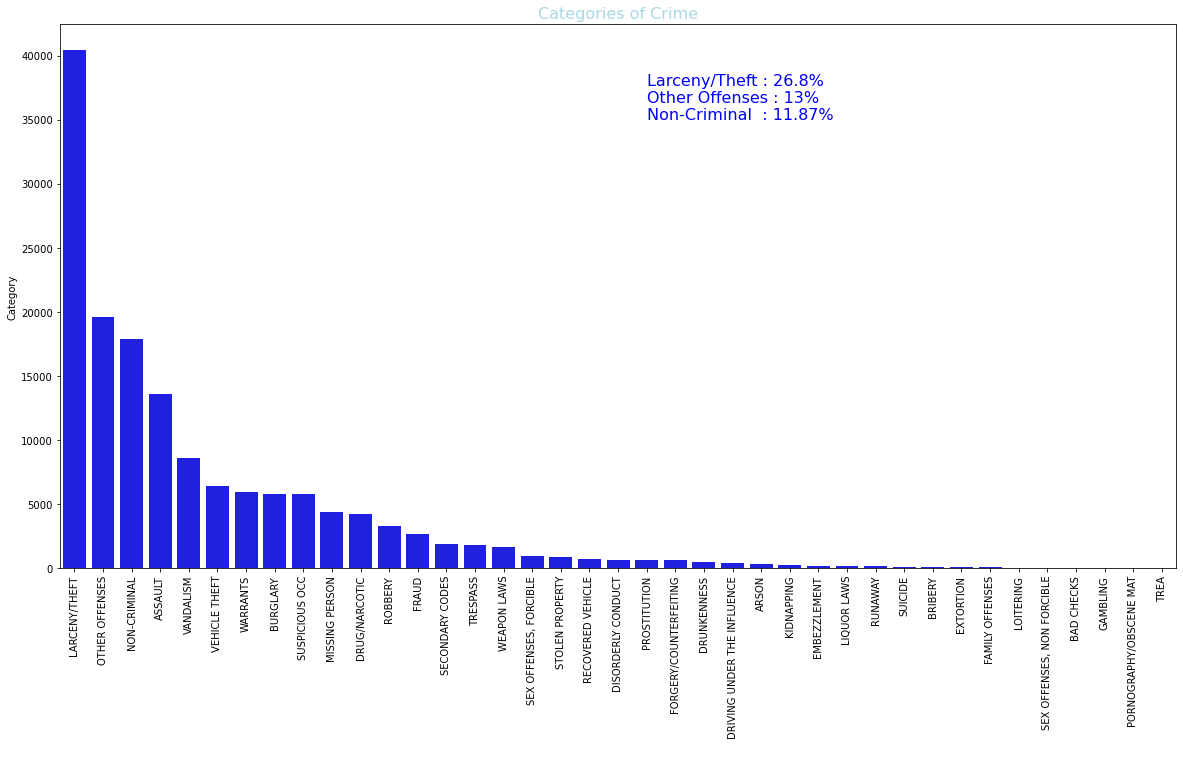

In [23]:
####Pandas
##Categoreis of Crime
a = data.Category.value_counts().reset_index() ## get counted category and its index 
print(40409/sum(data.Category.value_counts())*100)  ## percentage of highest crime category
print(19599/sum(data.Category.value_counts())*100)
print(17866/sum(data.Category.value_counts())*100)
plt.figure(figsize = (20,10))
sns.barplot(x = a['index'], y = 'Category', data = a, color = 'blue')
plt.xticks(rotation = 90)
plt.xlabel(' ')
plt.title('Categories of Crime', fontdict = {'color': 'lightblue', 'size':16})
plt.text(x = 20, y = 35000,s = "Larceny/Theft : 26.8% \nOther Offenses : 13%\nNon-Criminal  : 11.87%", fontsize = 16, color = 'blue')
plt.show()

In [24]:
### SQL Statement
### Display the top 20 Dates with highest number of incidents
####Friday appeared frenquently on this table
conn = create_connection(normalized_database_filename)
cur = conn.cursor()
sql_statement = "Select Date ||' '||DayofWeek||'' as Date, count(*) as Incident_Counts from Incident group by Date order by Incident_Counts desc Limit 20;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,Date,Incident_Counts
0,01/01/2016 12:00:00 AM Friday,558
1,10/08/2016 12:00:00 AM Saturday,532
2,04/01/2016 12:00:00 AM Friday,525
3,01/29/2016 12:00:00 AM Friday,514
4,12/14/2016 12:00:00 AM Wednesday,507
5,06/25/2016 12:00:00 AM Saturday,507
6,07/01/2016 12:00:00 AM Friday,505
7,02/04/2016 12:00:00 AM Thursday,492
8,02/01/2016 12:00:00 AM Monday,492
9,11/18/2016 12:00:00 AM Friday,489


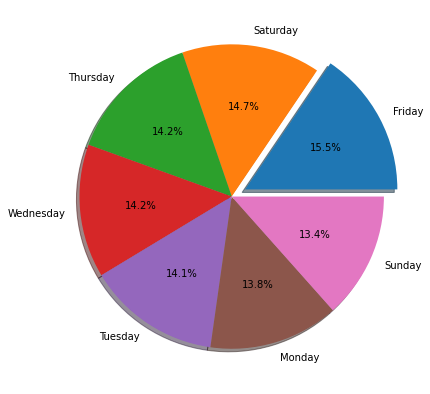

In [25]:
#Creating an attribute to identify if the day is weekend or not
data['iswknd'] = data.DayOfWeek.apply(lambda x: 1 if x in ['Saturday','Sunday'] else 0)
### Day of Week Pie Chart
a = data.DayOfWeek.value_counts(normalize = True).reset_index()
a['DayOfWeek'] = 100*a['DayOfWeek']
plt.figure(figsize = (7,7))
plt.pie(x = a['DayOfWeek'], labels = a['index'], explode = [0.1,0,0,0,0,0,0], shadow = True, autopct = '%1.1f%%')
plt.show()

In [26]:
# Creating a categorical variable for time containing the categories
# Midnight : (23:00 - 02:00)
# Early Morning : (03:00 - 06:00)
# Morning : (07:00 - 10:00)
# Noon : (11:00 - 14:00)
# Evening : (15:00 - 18:00)
# Night : (19:00 - 22:00)
def PartofDay(a):
    if a in ['23','00','01','02']:
        return 'Midnight'
    elif a in ['03','04','05','06']:
        return 'Early Morning'
    elif a in ['07','08','09','10']:
        return 'Morning'
    elif a in ['11','12','13','14']:
        return 'Noon'
    elif a in ['15','16','17','18']:
        return 'Evening'
    else:
        return 'Night'
    

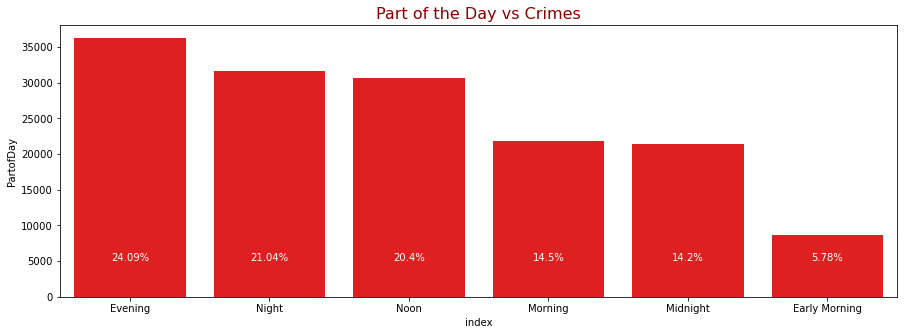

In [27]:
### Part of the Day vs Crimes - Bar Chart
data['PartofDay'] = data.Time.apply(lambda x: PartofDay(x.split(':')[0]))
a = data.PartofDay.value_counts().reset_index()
a1 = data.PartofDay.value_counts(normalize = True)
plt.figure(figsize = (15,5))
sns.barplot(x = a['index'], y = 'PartofDay', data = a, color = 'red')
plt.title('Part of the Day vs Crimes', fontdict = {'color': 'darkred', 'size':16})
for i in range(6):
    plt.text(x = i, y = 5000, s = str(round(100*a1[i],2))+'%', horizontalalignment = 'center', color = 'white')
plt.show()
####Almost Quarter of crime incidents happens during evening,bewteen 15:00 to 18:00

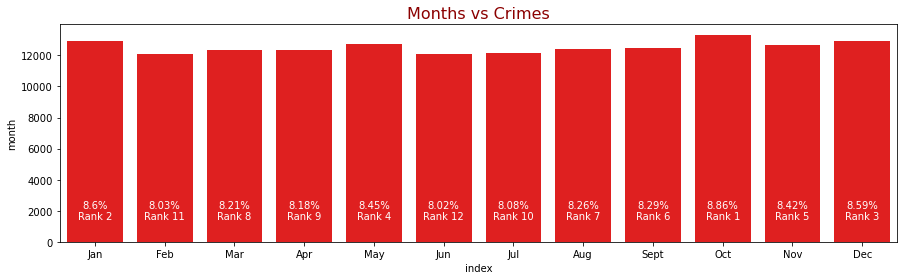

In [38]:
# Extracting the month and day information 
data['month'] = pd.DatetimeIndex(data.Date).month
data['day'] = pd.DatetimeIndex(data.Date).day
### Months vs Crime - Bar Chart
##October highest crime rate of 8.86%
a = data.month.value_counts().reset_index()
a.sort_values('index', inplace = True)
m = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.figure(figsize = (15,4))
sns.barplot(x = a['index'], y = 'month', data = a, color = 'red')
plt.xticks(np.arange(0,12),m)
plt.title('Months vs Crimes', fontdict = {'color': 'darkred', 'size':16})
a1 = data.month.value_counts(normalize = True)
for i in range(1,13):
    plt.text(x = i-1, y = 2000, s = str(round(100*a1[i],2))+'%'+'\n'+'Rank '+str(a.index[i-1]+1), horizontalalignment = 'center', verticalalignment = 'center', color = 'white')
plt.show()

In [29]:
### SQL Statement
### Display total incidents happened in each district; sorting by total_Incidents in descending order. 
### Output column: District, total incidents
conn = create_connection(normalized_database_filename)
cur = conn.cursor()
sql_statement = "Select DistrictName, count(IncidentID) as total_Incidents from Incident inner join District using (DistrictName) group by DistrictName order by total_Incidents desc;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,DistrictName,total_Incidents
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


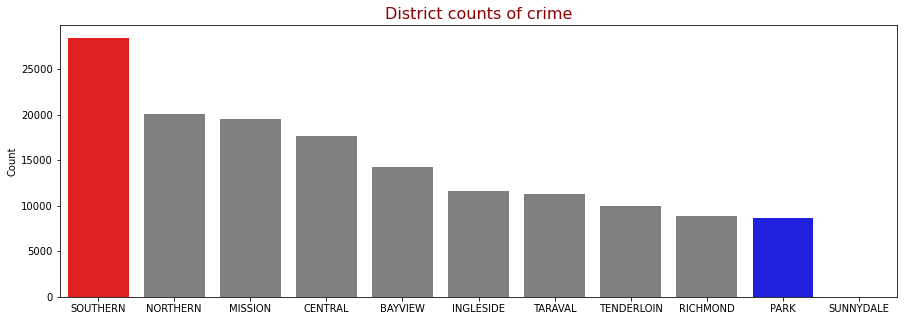

In [39]:
# Number of Crimes recorded by districts¶
a = data.PdDistrict.value_counts().reset_index()
plt.figure(figsize = [15,5])
sns.barplot(x = a['index'],y = 'PdDistrict', data = a, palette = ['red']+['grey']*8+['blue'])
plt.xlabel('')
plt.ylabel('Count')
plt.title('District counts of crime', fontdict = {'color': 'darkred', 'size':16})
plt.show()


In [31]:
####以上我说


In [32]:
### SQL Statement
### Display the top 20 time frames that happened the incidents and their location 
### Output: Time, IncidentCounts, DistrictName, Address, Location 
conn = create_connection(normalized_database_filename)
cur = conn.cursor()
sql_statement = "Select Time, count(*) as Incident_Counts, DistrictName, Address, Location from Incident inner join District using (DistrictName) group by Time order by Incident_Counts desc Limit 20;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,Time,Incident_Counts,DistrictName,Address,Location
0,12:00,3842,CENTRAL,100 Block of LOMBARD ST,"(37.8039838091919, -122.404193586978)"
1,00:01,3397,NORTHERN,300 Block of FULTON ST,"(37.7787958771466, -122.422536478306)"
2,18:00,3165,TARAVAL,1200 Block of 15TH AV,"(37.7646817096397, -122.472785857895)"
3,19:00,2912,RICHMOND,4700 Block of GEARY BL,"(37.7806269247284, -122.470174478935)"
4,20:00,2902,PARK,1000 Block of COLE ST,"(37.7644297714074, -122.449751652563)"
5,17:00,2830,TARAVAL,0 Block of ARDENWOOD WY,"(37.7352681469084, -122.472715759631)"
6,21:00,2590,NORTHERN,GOUGH ST / ROSE ST,"(37.7736186276456, -122.422315670749)"
7,22:00,2479,BAYVIEW,100 Block of BOUTWELL ST,"(37.7347987740694, -122.405478287283)"
8,16:00,2443,CENTRAL,100 Block of CLAY ST,"(37.7953338267436, -122.397373740066)"
9,15:00,2406,NORTHERN,1500 Block of SUTTER ST,"(37.7870798144443, -122.425883358148)"


In [33]:
##conda install -c conda-forge folium

In [34]:
### SF Crime Location Bubble Map - limit 500
import folium
# MAX_RECORDS = 10
SF_COORDINATES = (37.76, -122.45)
## create empty map zoomed in on San Francisco
map = folium.Map(location=SF_COORDINATES, zoom_start=12)
# add a marker for every record in the filtered data, use a clustered view

for each in data[0:500].iterrows():
    folium.CircleMarker(
        location = [each[1]['Y'],each[1]['X']], 
        clustered_marker = True,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(map)
  
display(map)

In [35]:
### SQL Statement
### Display the Resolution Detail and their counts
conn = create_connection(normalized_database_filename)
cur = conn.cursor()
sql_statement = "Select ResolutionDetail, count(*) as Count_Resolved from Incident inner join Resolution using (ResolutionDetail) group by ResolutionDetail order by Count_Resolved desc;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,ResolutionDetail,Count_Resolved
0,NONE,107780
1,"ARREST, BOOKED",39416
2,UNFOUNDED,1608
3,JUVENILE BOOKED,1056
4,EXCEPTIONAL CLEARANCE,371
5,"ARREST, CITED",144
6,CLEARED-CONTACT JUVENILE FOR MORE INFO,58
7,NOT PROSECUTED,22
8,LOCATED,20
9,PSYCHOPATHIC CASE,17


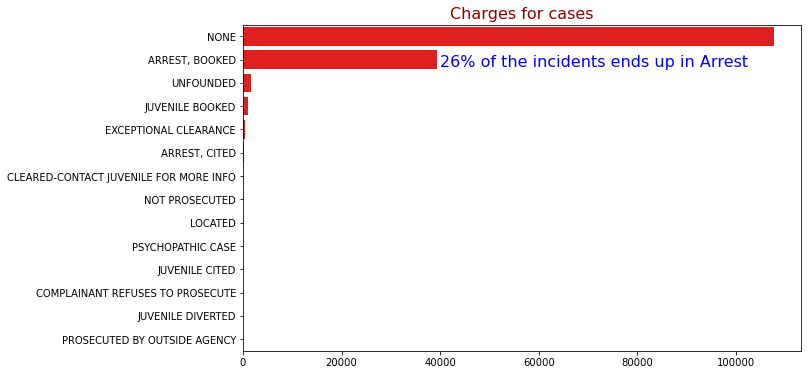

In [36]:
### Charges for Cases - Bar Chart
a = data.Resolution.value_counts().reset_index()
plt.figure(figsize = (10, 6))
sns.barplot(y = a['index'], x = 'Resolution', data = a, color = 'red')
plt.title('Charges for cases', fontdict = {'color': 'darkred', 'size':16})
plt.xlabel('')
plt.ylabel('')
plt.text(x = 40000, y = 1.3, s = '26% of the incidents ends up in Arrest',fontsize = 16, color = 'blue')
plt.show()

In [37]:
### SQL Statement
### Display the top 20 of detail crime that doesn't have resolution During year 2016
### Output: num_of_no_resol,Descript
conn = create_connection(normalized_database_filename)
cur = conn.cursor()
sql_statement = "select count(*) as num_of_no_resol,Descript from Incident inner join Resolution using (ResolutionDetail) where ResolutionDetail = 'NONE' group by Descript order by num_of_no_resol desc limit 20;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,num_of_no_resol,Descript
0,17684,GRAND THEFT FROM LOCKED AUTO
1,4567,LOST PROPERTY
2,4362,PETTY THEFT OF PROPERTY
3,4285,"AIDED CASE, MENTAL DISTURBED"
4,3914,PETTY THEFT FROM LOCKED AUTO
5,3845,"MALICIOUS MISCHIEF, VANDALISM"
6,3294,STOLEN AUTOMOBILE
7,3018,BATTERY
8,2961,FOUND PROPERTY
9,2814,SUSPICIOUS OCCURRENCE
